In [38]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os


In [39]:
data_file = "HouseListings.csv"



In [40]:

data_df = pd.read_csv(data_file, encoding='ISO-8859-1')
data_df.head()    

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [43]:
# only numeric columns for statistical calculations
numeric_df = data_df.select_dtypes(include='number')

# Calculate statistical measures (mean, median, mode, standard deviation) for numeric columns only
statistics_df = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Mode": numeric_df.mode().iloc[0],
    "Standard Deviation": numeric_df.std()
})

# Print the calculated statistics
statistics_df

,Mean,Median,Mode,Standard Deviation
Price,943296.251812,699000.0000,599900.0000,1.020110e+06
Number_Beds,3.283661,3.0000,3.0000,1.730654e+00
Number_Baths,2.532403,2.0000,2.0000,1.371910e+00
Population,636015.093268,242460.0000,226404.0000,1.120016e+06
Latitude,47.446556,49.0250,50.4547,3.333855e+00
Longitude,-98.421636,-104.6067,-104.6067,2.228094e+01
Median_Family_Income,89643.103416,89000.0000,85000.0000,1.213235e+04


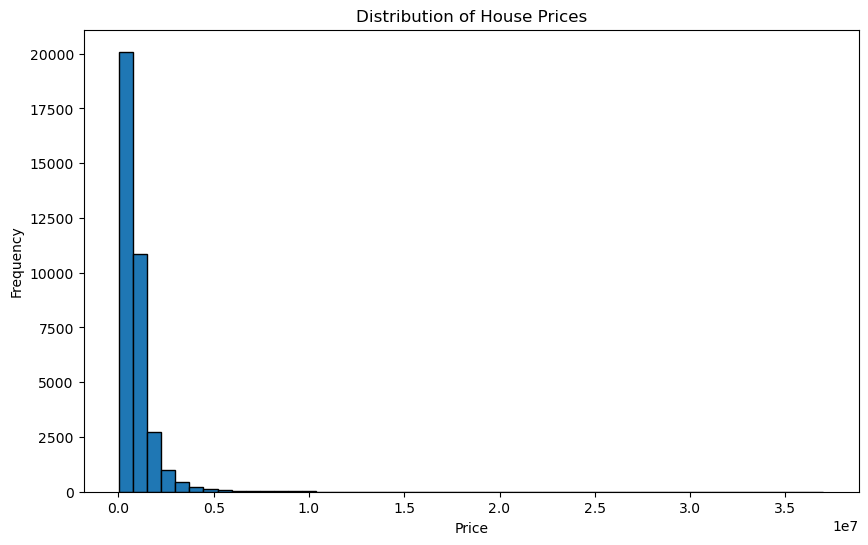

In [15]:
# Visualize the distributions
plt.figure(figsize=(10, 6))
plt.hist(data_df['Price'], bins=50, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

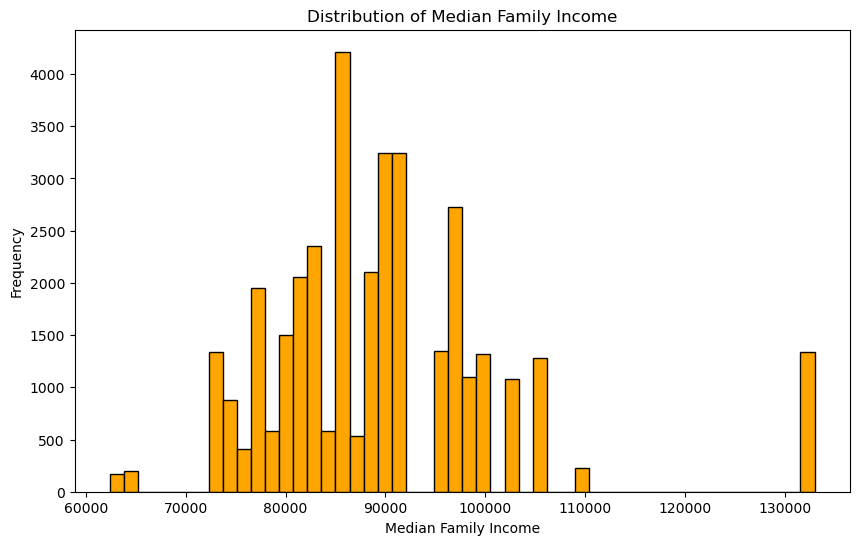

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data_df['Median_Family_Income'], bins=50, edgecolor='black', color='orange')
plt.title('Distribution of Median Family Income')
plt.xlabel('Median Family Income')
plt.ylabel('Frequency')
plt.show()

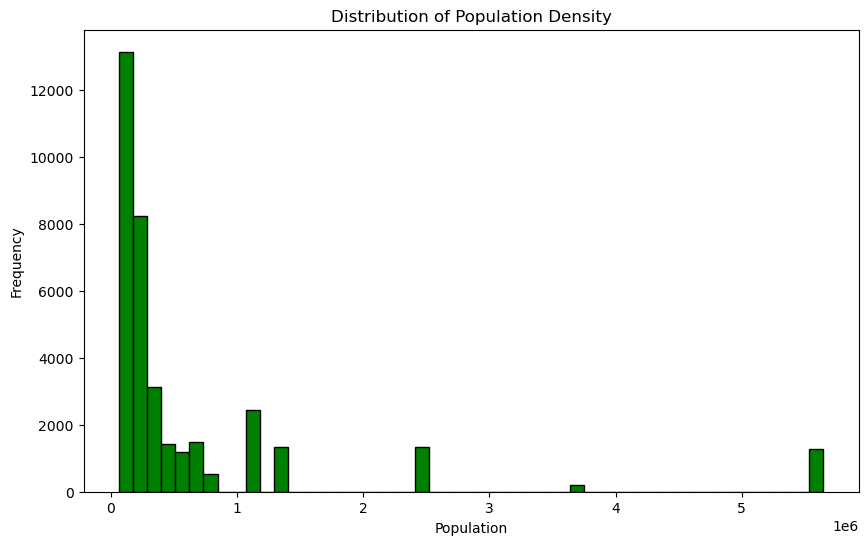

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data_df['Population'], bins=50, edgecolor='black', color='green')
plt.title('Distribution of Population Density')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

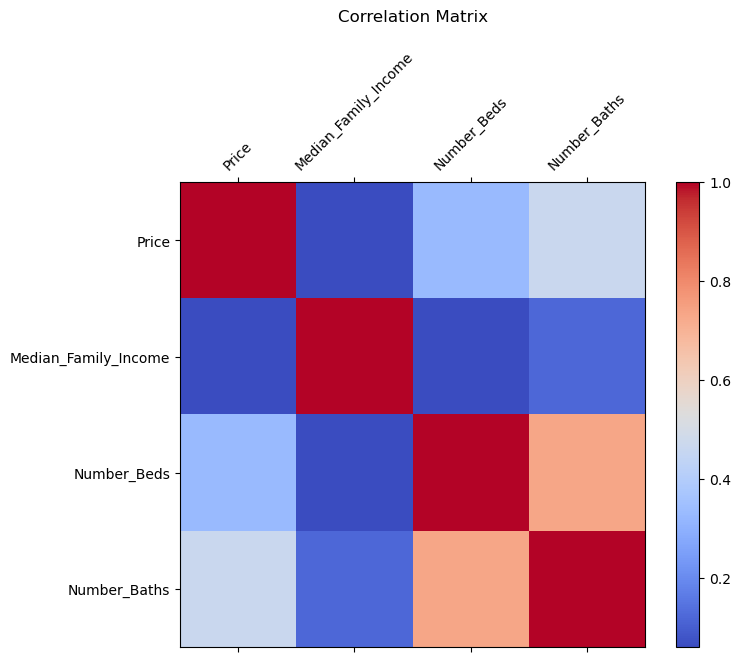

,Price,Median_Family_Income,Number_Beds,Number_Baths
Price,1.000000,0.059795,0.329956,0.466821
Median_Family_Income,0.059795,1.000000,0.062508,0.122173
Number_Beds,0.329956,0.062508,1.000000,0.734809
Number_Baths,0.466821,0.122173,0.734809,1.000000


In [19]:
# Calculate and visualize correlation matrix
correlation_matrix = data_df[['Price', 'Median_Family_Income', 'Number_Beds', 'Number_Baths']].corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()
correlation_matrix

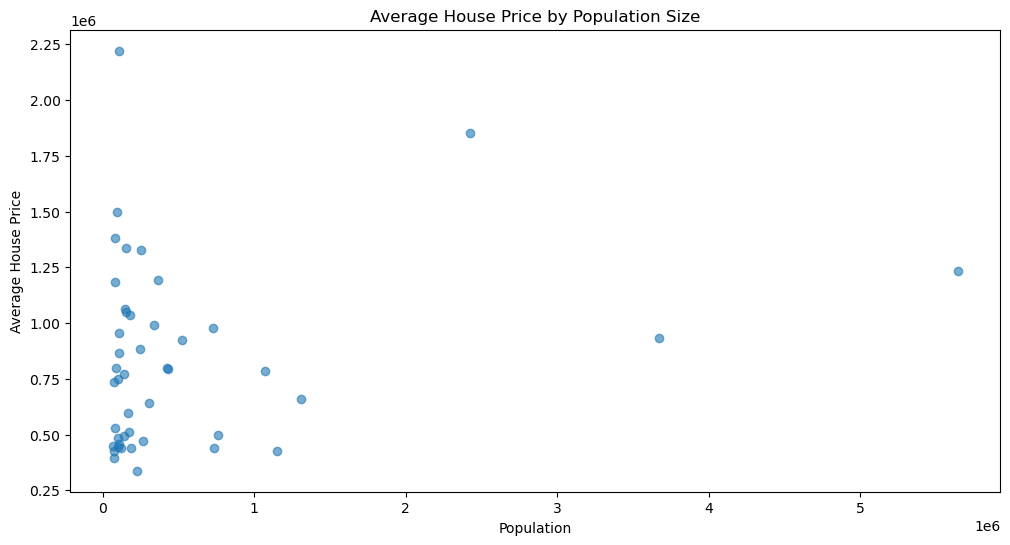

In [44]:
# Geographical Analysis: Average house price by city and population
city_data = data_df.groupby('City').agg({
    'Price': 'mean',
    'Population': 'mean',
    'Median_Family_Income': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(city_data['Population'], city_data['Price'], alpha=0.6)
plt.title('Average House Price by Population Size')
plt.xlabel('Population')
plt.ylabel('Average House Price')
plt.show()

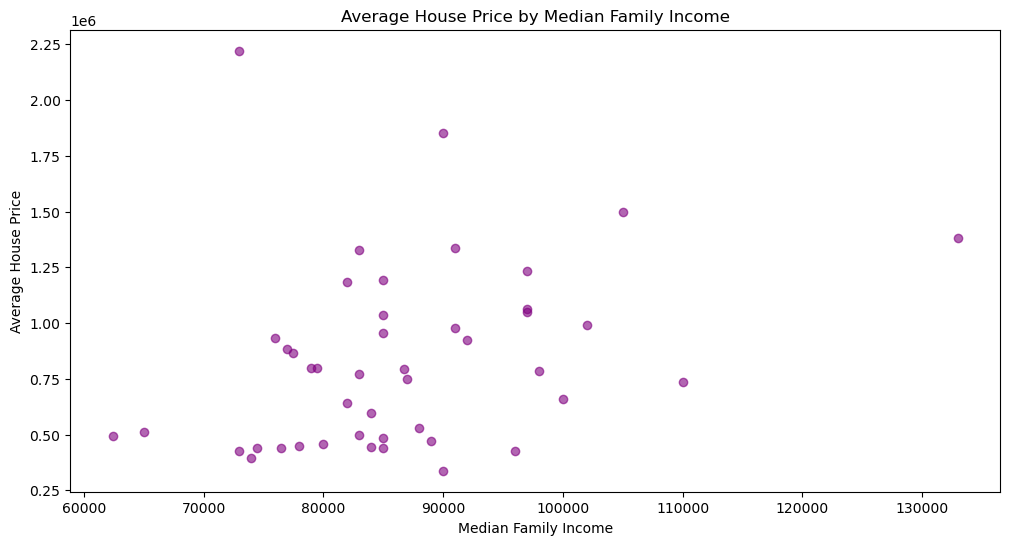

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(city_data['Median_Family_Income'], city_data['Price'], alpha=0.6, color='purple')
plt.title('Average House Price by Median Family Income')
plt.xlabel('Median Family Income')
plt.ylabel('Average House Price')
plt.show()

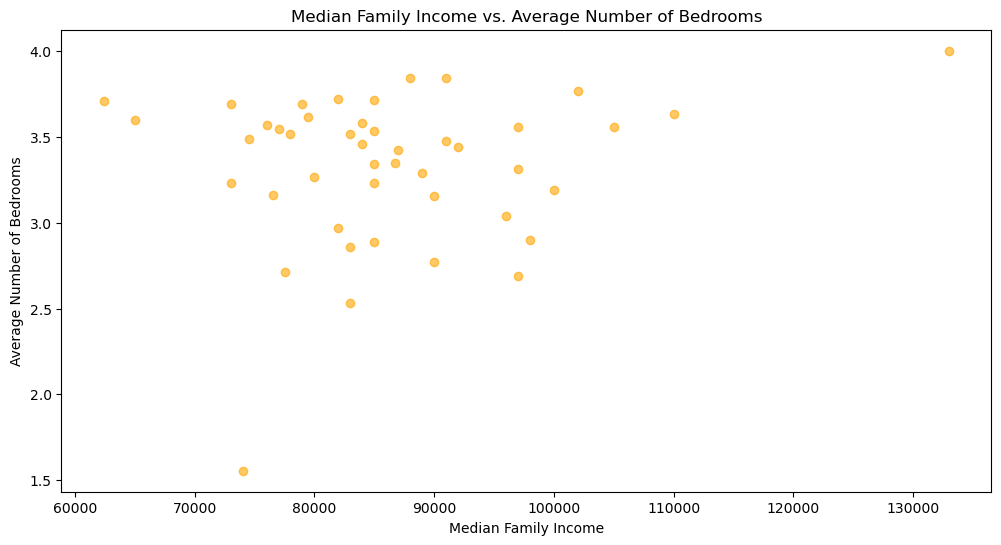

In [46]:
# Socioeconomic Analysis: Median income and housing features (number of bedrooms and bathrooms)
city_features = data_df.groupby('City').agg({
    'Median_Family_Income': 'mean',
    'Number_Beds': 'mean',
    'Number_Baths': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(city_features['Median_Family_Income'], city_features['Number_Beds'], color='orange', alpha=0.6)
plt.title('Median Family Income vs. Average Number of Bedrooms')
plt.xlabel('Median Family Income')
plt.ylabel('Average Number of Bedrooms')
plt.show()

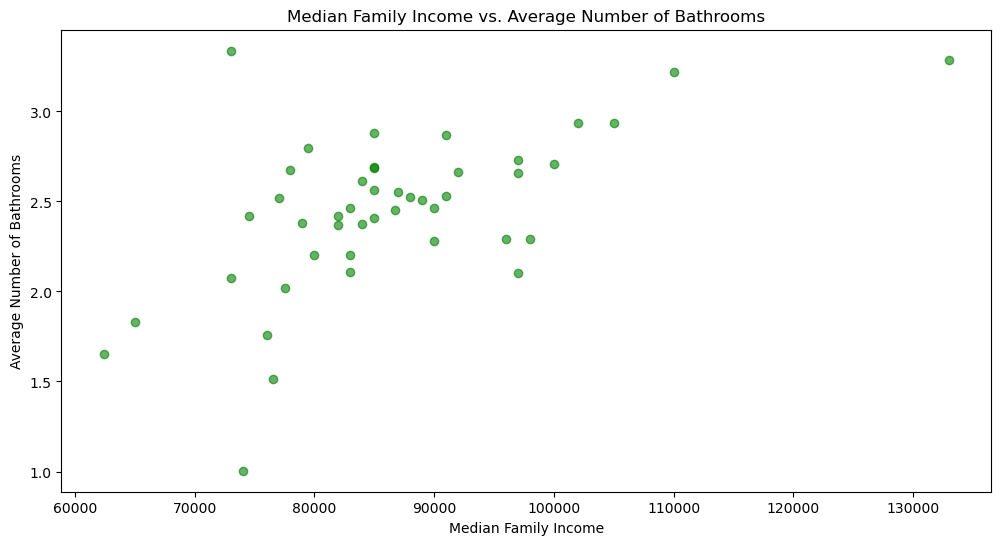

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(city_features['Median_Family_Income'], city_features['Number_Baths'], color='green', alpha=0.6)
plt.title('Median Family Income vs. Average Number of Bathrooms')
plt.xlabel('Median Family Income')
plt.ylabel('Average Number of Bathrooms')
plt.show()

In [33]:
#How does housing affordability vary across different Canadian cities?
#To analyze how housing affordability varies across different Canadian cities, we can explore several key indicators and relationships:
#1. House Price by City
#2. Median Family Income and Housing Affordability
#3. Population Density and Housing Affordability

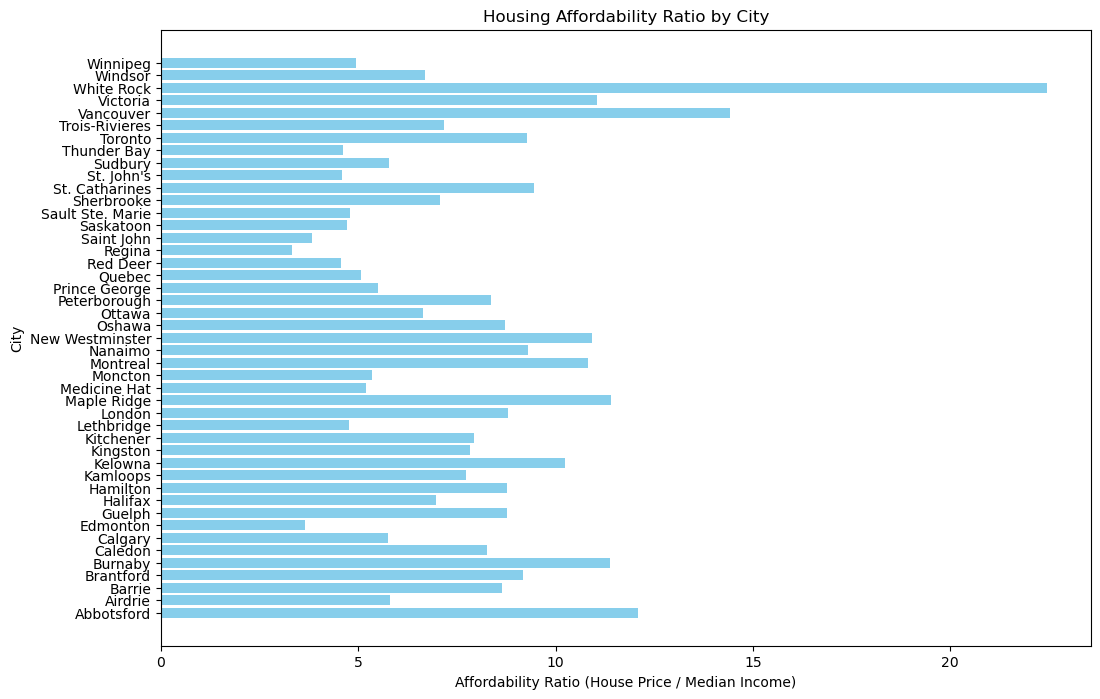

In [31]:
# Calculate the median house price and median family income by city
city_affordability = data_df.groupby('City').agg({
    'Price': 'median',
    'Median_Family_Income': 'median',
    'Population': 'mean'
}).reset_index()

# Calculate the affordability ratio (house price to income ratio)
city_affordability['Affordability_Ratio'] = city_affordability['Price'] / city_affordability['Median_Family_Income']

# Plot the affordability ratio across cities
plt.figure(figsize=(12, 8))
plt.barh(city_affordability['City'], city_affordability['Affordability_Ratio'], color='skyblue')
plt.xlabel('Affordability Ratio (House Price / Median Income)')
plt.ylabel('City')
plt.title('Housing Affordability Ratio by City')
plt.show()

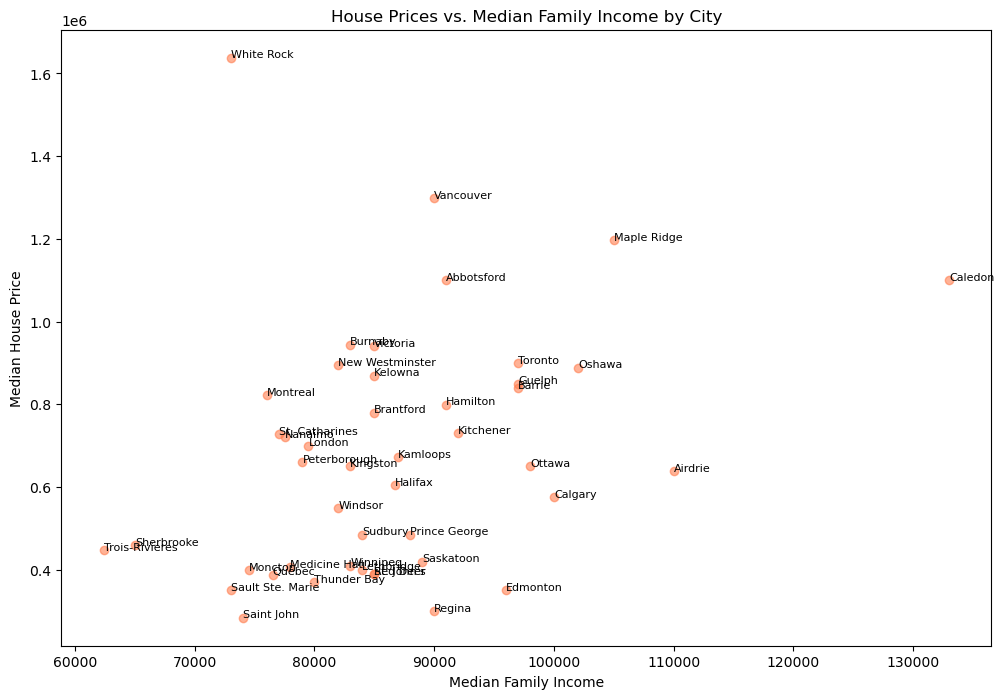

In [37]:

# Plot average house price against median family income to visualize affordability
plt.figure(figsize=(12, 8))
plt.scatter(city_affordability['Median_Family_Income'], city_affordability['Price'], alpha=0.6, color='coral')
for i, txt in enumerate(city_affordability['City']):
    plt.annotate(txt, (city_affordability['Median_Family_Income'][i], city_affordability['Price'][i]), fontsize=8)
plt.xlabel('Median Family Income')
plt.ylabel('Median House Price')
plt.title('House Prices vs. Median Family Income by City')
plt.show()


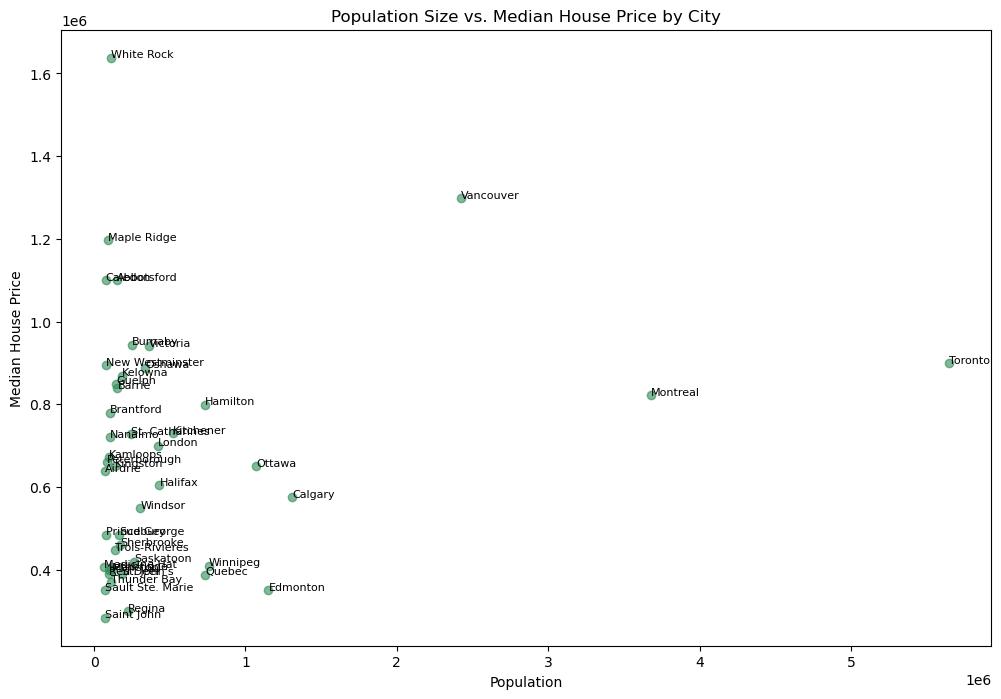

In [34]:
# Plot population density and its effect on house price
plt.figure(figsize=(12, 8))
plt.scatter(city_affordability['Population'], city_affordability['Price'], alpha=0.6, color='seagreen')
for i, txt in enumerate(city_affordability['City']):
    plt.annotate(txt, (city_affordability['Population'][i], city_affordability['Price'][i]), fontsize=8)
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.title('Population Size vs. Median House Price by City')
plt.show()

In [36]:

# Print out the affordability ratio data for further analysis
city_affordability[['City', 'Price', 'Median_Family_Income', 'Affordability_Ratio']].sort_values(by='Affordability_Ratio', ascending=False)

,City,Price,Median_Family_Income,Affordability_Ratio
42,White Rock,1638000.0,73000.0,22.438356
40,Vancouver,1298000.0,90000.0,14.422222
0,Abbotsford,1100000.0,91000.0,12.087912
17,Maple Ridge,1196500.0,105000.0,11.395238
4,Burnaby,943800.0,83000.0,11.371084
41,Victoria,939900.0,85000.0,11.057647
22,New Westminster,895000.0,82000.0,10.914634
20,Montreal,821750.0,76000.0,10.812500
12,Kelowna,869650.0,85000.0,10.231176
34,St. Catharines,728444.0,77000.0,9.460312
